# Analysis Steps

## 1. Exploratory Data Analysis (EDA)

## 2. LDA Projection

### 2.1. Compute Mu and Within-Class Scatter Matrix (SW)

SW = S0 + S1 + S2 + S3 + S4
S0-S4 = Σ(Xi - μi)(Xi - μi)^T

### 2.2. Compute Between-Class Scatter Matrix (SB)

m = 1/k * Σ(k) = 1/5 * Σ(μi)
SB = Σ(Ni (μi - m)(μi - m)^T)

### 2.3. Find LDA Projection Vector

S⁻¹W SB = V D V^T

## 3. Implement Naive Bayes

### 3.1. Get Simple Probabilities

### 3.2.

### 3.3.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## Step 1 : Explore the data , EDA

In [2]:
# Specifying the path to your .npy file
train_file_path = 'fashion_train.npy'
test_file_path = 'fashion_test.npy'

# Load the data from the .npy file
train_data = np.load(train_file_path)
test_data = np.load(test_file_path)
print(train_data)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 3]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [3]:
#convert it to a dataframe
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)
# print the first 5 items
print(train_df.head())

   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    0    0    0    0    0    3    0    0    0   41  ...   63   78   11    0   
1    0    0    0    0    0    0    0    0    0    0  ...   32    0    0    0   
2    0    0    0    0    0    1    1    0    0    0  ...  168  119    0    0   
3    0    0    0    0    0    0    0    0    0   98  ...   21    0    0    0   
4    0    0    0    0    0    0    0    2    0    0  ...   88  128   46    0   

   779  780  781  782  783  784  
0    2    0    0    0    0    0  
1    0    0    0    0    0    1  
2    0    0    0    0    0    0  
3    0    0    0    0    0    3  
4    0    0    0    0    0    4  

[5 rows x 785 columns]


### Plot their means

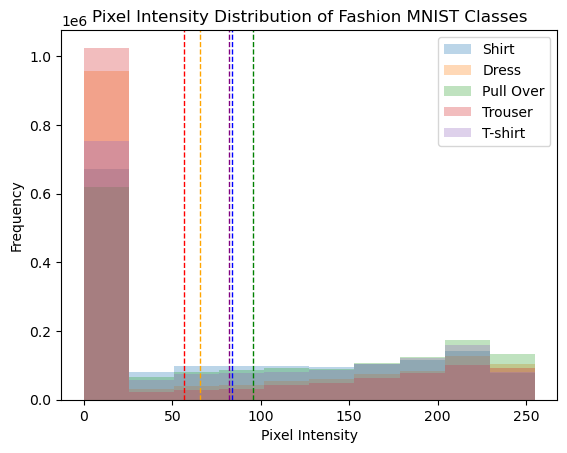

In [4]:
#get list of
t_shirt_list = []
trouser_list = []
pull_over_list = []
dress_list = []
shirt_list = []

#create subset of data with the different classes
for i in range(len(train_data)):
    if train_data[i][-1] == 0:
        t_shirt_list.append(train_data[i])
    elif train_data[i][-1] == 1:
        trouser_list.append(train_data[i])
    elif train_data[i][-1] == 2:
        pull_over_list.append(train_data[i])
    elif train_data[i][-1] == 3:
        dress_list.append(train_data[i])
    elif train_data[i][-1] == 4:
        shirt_list.append(train_data[i])

mu0_tshirts = np.mean(t_shirt_list)
mu1_trousers = np.mean(trouser_list)
mu2_pull_over = np.mean(pull_over_list)
mu3_dress = np.mean(dress_list)
mu4_shirt = np.mean(shirt_list)
concatenated_tshirt = np.concatenate(t_shirt_list)
concatenated_trouser = np.concatenate(trouser_list)
concatenated_pull_over = np.concatenate(pull_over_list)
concatenated_dress = np.concatenate(dress_list)
concatenated_shirt = np.concatenate(shirt_list)

#plot all the histograms on top of eachother
#plt.hist(concatenated_shirt)
#plt.hist(concatenated_dress)
#plt.hist(concatenated_pull_over)
#plt.hist(concatenated_trouser)
#plt.hist(concatenated_tshirt)
#add transparency
plt.hist(concatenated_shirt, alpha = 0.3)
plt.hist(concatenated_dress, alpha = 0.3)
plt.hist(concatenated_pull_over, alpha = 0.3)
plt.hist(concatenated_trouser, alpha = 0.3)
plt.hist(concatenated_tshirt, alpha = 0.3)
plt.legend(['Shirt', 'Dress', 'Pull Over', 'Trouser', 'T-shirt'])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Distribution of Fashion MNIST Classes')
#add mu lines
plt.axvline(mu0_tshirts, color='purple', linestyle='dashed', linewidth=1)
plt.axvline(mu1_trousers, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mu2_pull_over, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mu3_dress, color='orange', linestyle='dashed', linewidth=1)
plt.axvline(mu4_shirt, color='blue', linestyle='dashed', linewidth=1)

## 2.1. Compute Mu and Within-Class Scatter Matrix (SW)

SW = S0 + S1 + S2 + S3 + S4
S0-S4 = Σ(Xi - μi)(Xi - μi)^T

In [5]:
import pandas as pd

# Assuming your DataFrame is named 'train_df'
# If not, you can create it using pd.DataFrame(your_data)

# Exclude the last column (label) from the original DataFrame
#features_df = train_df.iloc[:, :-1]

# Separate the DataFrame into five based on the values in the original last column
tshirts_df = train_df[train_df[784] == 0]
trouser_df = train_df[train_df[784] == 1]
pullover_df = train_df[train_df[784] == 2]
dress_df = train_df[train_df[784] == 3]
shirt_df = train_df[train_df[784] == 4]

# Print or use the resulting DataFrames as needed
print("Class 0 - Tshirt DataFrame:")
print(tshirts_df.head())

#print("\nClass 1- Trouser DataFrame:")
#print(trouser_df.head())

#print("\nClass 2- Pullover DataFrame:")
#print(pullover_df.head())

#print("\nClass 3 - DressDataFrame:")
#print(dress_df.head())

#print("\nClass 4 - Shirt DataFrame:")
#print(shirt_df.head())


Class 0 - Tshirt DataFrame:
    0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0     0    0    0    0    0    3    0    0    0   41  ...   63   78   11    0   
2     0    0    0    0    0    1    1    0    0    0  ...  168  119    0    0   
14    0    0    0    0    0    1    0    0    0   38  ...   31   35    0    0   
18    0    0    0    0    0    1    0    0    0    0  ...  107   97    0    0   
20    0    0    0    0    0    0    0    0    0    0  ...   28    3    0    0   

    779  780  781  782  783  784  
0     2    0    0    0    0    0  
2     0    0    0    0    0    0  
14    0    0    0    0    0    0  
18    1    0    0    0    0    0  
20    0    0    0    0    0    0  

[5 rows x 785 columns]


In [8]:
# Get the mean
# Calculate the mean of each column for each class

#tshirts_df.loc[:, tshirts_df.loc.columns != 'labels'].mean()
#tshirts_df.loc[:, tshirts_df.loc.columns != 'labels'].mean()

mean_without_last_column = tshirts_df.iloc[:, :-1].mean()

print(mean_without_last_column)

#mean_class_0 = tshirts_df.mean()
#mean_class_1 = tshirts_df.mean()
#mean_class_2 = class_2_df.mean()
#mean_class_3 = class_3_df.mean()
#mean_class_4 = class_4_df.mean()

0      0.003935
1      0.020167
2      0.157403
3      0.348746
4      0.329070
         ...   
779    1.865716
780    0.736350
781    0.234137
782    0.030497
783    0.012789
Length: 784, dtype: float64
